In [2]:
import plumed
import matplotlib.pyplot as plt
import os
import subprocess

In [3]:
import MDAnalysis

In [4]:
import numpy as np
import math

In [4]:
ls

align.sh*      fes_12.dat   fes_161.dat  fes_45.dat  fes_77.dat
analisi.ipynb  fes_130.dat  fes_162.dat  fes_46.dat  fes_78.dat
fes_0.dat      fes_131.dat  fes_163.dat  fes_47.dat  fes_79.dat
fes_100.dat    fes_132.dat  fes_16.dat   fes_48.dat  fes_7.dat
fes_101.dat    fes_133.dat  fes_17.dat   fes_49.dat  fes_80.dat
fes_102.dat    fes_134.dat  fes_18.dat   fes_4.dat   fes_81.dat
fes_103.dat    fes_135.dat  fes_19.dat   fes_50.dat  fes_82.dat
fes_104.dat    fes_136.dat  fes_1.dat    fes_51.dat  fes_83.dat
fes_105.dat    fes_137.dat  fes_20.dat   fes_52.dat  fes_84.dat
fes_106.dat    fes_138.dat  fes_21.dat   fes_53.dat  fes_85.dat
fes_107.dat    fes_139.dat  fes_22.dat   fes_54.dat  fes_86.dat
fes_108.dat    fes_13.dat   fes_23.dat   fes_55.dat  fes_87.dat
fes_109.dat    fes_140.dat  fes_24.dat   fes_56.dat  fes_88.dat
fes_10.dat     fes_141.dat  fes_25.dat   fes_57.dat  fes_89.dat
fes_110.dat    fes_142.dat  fes_26.dat   fes_58.dat  fes_8.dat
fes_111.dat    fes_143.dat  fes_27.dat   f

In [5]:
miadir=os.getcwd()

In [6]:
print (miadir)

/hdnas/marcol/tau/polimeri-120/monomer/CV-meta4/select-new


In [7]:
%%bash
pwd

/hdnas/marcol/tau/polimeri-120/monomer/CV-meta4/select-new


In [8]:
!pwd

/hdnas/marcol/tau/polimeri-120/monomer/CV-meta4/select-new


In [12]:
%%bash
plumed sum_hills --hills HILLS --stride 20000 --mintozero

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action FAKE
PLUMED:   with label

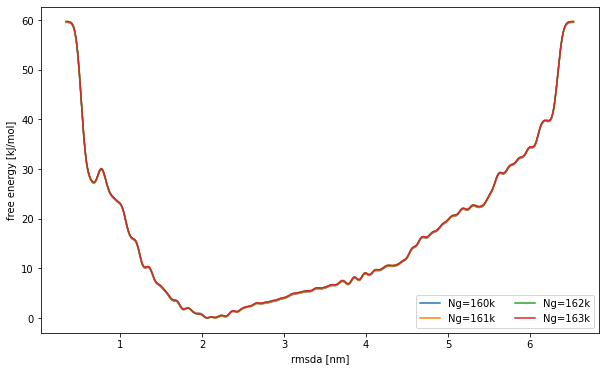

In [11]:
plt.figure(figsize=(10,6))
for i in range(160,164,1):

    data=plumed.read_as_pandas("fes_"+str(i)+".dat")
    plt.plot(data["rmsda"],data["file.free"], label="Ng="+str(int(i/1))+"k")

plt.xlabel("rmsda [nm]")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=2)

In [17]:
data_hills=plumed.read_as_pandas("HILLS")


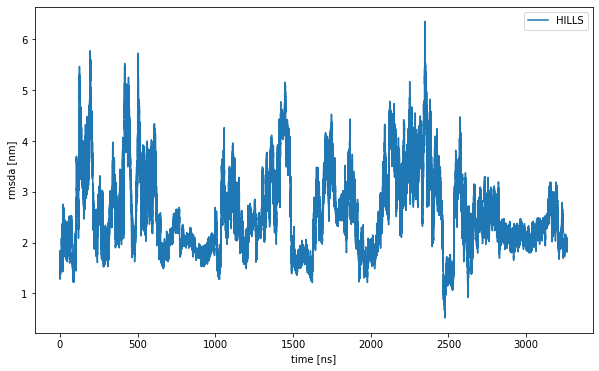

In [26]:
plt.figure(figsize=(10,6))
plt.xlabel("time [ns]")
plt.ylabel("rmsda [nm]")
plt.plot(data_hills["time"]/1000.0,data_hills["rmsda"],label="HILLS")
plt.legend()

In [52]:
%%bash
cat > "plumed_rew.dat" << EOF
rmsda: RMSD REFERENCE=prot_ref_a.pdb TYPE=OPTIMAL

metad: METAD ARG=rmsda ...
PACE=10000000 HEIGHT=0.0 SIGMA=0.05 FILE=HILLS GRID_MIN=0.0 GRID_MAX=10.0 BIASFACTOR=2.0 TEMP=310.0
RESTART=YES # <- this is the new stuff!
...

# Use the metadynamics bias as argument
as: REWEIGHT_BIAS ARG=metad.bias
# Calculate histograms of phi and psi dihedrals every 50 steps
# using the weights obtained from the metadynamics bias potentials (umbrella-sampling-like reweighting)
# Look at the manual to understand the parameters of the HISTOGRAM action!
hhrmsda: HISTOGRAM ARG=rmsda STRIDE=1 GRID_MIN=0.0 GRID_MAX=10.0 GRID_BIN=200 BANDWIDTH=0.05 LOGWEIGHTS=as
# Convert histograms h(s) to free energies F(s) = -kBT * log(h(s))
ffrmsda: CONVERT_TO_FES GRID=hhrmsda
# Print out the free energies F(s) to file once the entire trajectory is processed
DUMPGRID GRID=ffrmsda FILE=ffrmsda_reweighted.dat

PRINT ARG=rmsda,metad.bias FILE=COLVAR_reweighted STRIDE=1 # <- also change this one!
EOF

In [18]:
'''
plumed driver --ixtc traj_comp_align.xtc --plumed plumed_rew.dat --kt 2.57748341158 --timestep 10.0
'''

'\nplumed driver --ixtc traj_comp_align.xtc --plumed plumed_rew.dat --kt 2.57748341158 --timestep 10.0\n'

In [20]:
%%bash
plumed driver --ixtc traj_comp_align.xtc --plumed plumed_rew.dat --kt 2.57748341158 --timestep 10.0

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1197
PLUMED: File suffix: 
PLUMED: FILE: plumed_rew.dat
PLUMED: Action RMSD
PLUMED:   with label rmsda
PLUMED:   reference from file prot_ref_a.pdb
PLUMED:   which contains 307 atoms
PLUMED:   with indices : 
PLUMED: 1 5 8 9 10 12 19 20 21 23 35 36 37 39 52 53 54 56 71 72 73 75 87 88 89 
PLUMED: 91 108 109 110 112 130 131 132 136 144 145 146 148 160 161 162 164 172 173 174 176 191 192 193 195 
PLUMED: 202 203 204 206 224 225 226 228 240 241 242

In [21]:
data_colvar_rew=plumed.read_as_pandas("COLVAR_reweighted")

In [5]:
data_b=plumed.read_as_pandas("fes_163.dat")
data_r=plumed.read_as_pandas("ffrmsda_reweighted.dat")


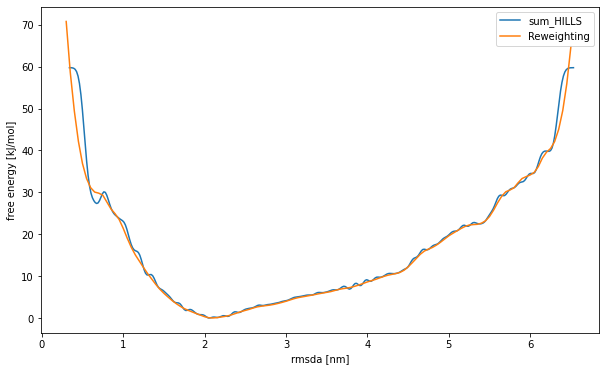

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel("rmsda [nm]")
plt.ylabel("free energy [kJ/mol]")
plt.plot(data_b["rmsda"],data_b["file.free"], label="sum_HILLS")
plt.plot(data_r["rmsda"],data_r["ffrmsda"]-min(data_r["ffrmsda"]),label="Reweighting")
plt.legend()

In [31]:
'''
%%bash
gmx trjcat -f traj_comp_align.xtc -o traj1.0-2.0.xtc -b 1000000 -e 2000000 -dt 10.0
gmx trjcat -f traj_comp_align.xtc -o traj2.0-3.0.xtc -b 2000000 -e 3000000 -dt 10.0
'''

'\n%%bash\ngmx trjcat -f traj_comp_align.xtc -o traj1.0-2.0.xtc -b 1000000 -e 2000000 -dt 10.0\ngmx trjcat -f traj_comp_align.xtc -o traj2.0-3.0.xtc -b 2000000 -e 3000000 -dt 10.0\n'

In [32]:
p=plumed.Plumed()

In [33]:
myhills=plumed.read_as_pandas("HILLS") # first read hills file

In [34]:
plumed.hills_time_average(myhills,"HILLS1.0-2.0",t0=1000000,t1=2000000) # time average between 1000 and 2000 ns

In [35]:
plumed.hills_time_average(myhills,"HILLS2.0-3.0",t0=2000000,t1=3000000) # time average between 2000 and 3000 ns

In [53]:
%%bash
cat > "plumed_rew1.0-2.0.dat" << EOF
rmsda: RMSD REFERENCE=prot_ref_a.pdb TYPE=OPTIMAL

metad: METAD ARG=rmsda ...
PACE=10000000 HEIGHT=0.0 SIGMA=0.05 FILE=HILLS1.0-2.0 GRID_MIN=0.0 GRID_MAX=10.0 BIASFACTOR=2.0 TEMP=310.0
RESTART=YES # <- this is the new stuff!
...

# Use the metadynamics bias as argument
as: REWEIGHT_BIAS ARG=metad.bias
# Calculate histograms of phi and psi dihedrals every 50 steps
# using the weights obtained from the metadynamics bias potentials (umbrella-sampling-like reweighting)
# Look at the manual to understand the parameters of the HISTOGRAM action!
hhrmsda: HISTOGRAM ARG=rmsda STRIDE=1 GRID_MIN=0.0 GRID_MAX=10.0 GRID_BIN=200 BANDWIDTH=0.05 LOGWEIGHTS=as
# Convert histograms h(s) to free energies F(s) = -kBT * log(h(s))
ffrmsda: CONVERT_TO_FES GRID=hhrmsda
# Print out the free energies F(s) to file once the entire trajectory is processed
DUMPGRID GRID=ffrmsda FILE=ffrmsda_reweighted1.0-2.0.dat

PRINT ARG=rmsda,metad.bias FILE=COLVAR_reweighted1.0-2.0 STRIDE=1 # <- also change this one!
EOF

In [36]:
'''
plumed driver --ixtc traj1.0-2.0.xtc --plumed plumed_rew1.0-2.0.dat --kt 2.57748341158 --timestep 10.0
'''

'\nplumed driver --ixtc traj1.0-2.0.xtc --plumed plumed_rew1.0-2.0.dat --kt 2.57748341158 --timestep 10.0\n'

In [37]:
%%bash
plumed driver --ixtc traj1.0-2.0.xtc --plumed plumed_rew1.0-2.0.dat --kt 2.57748341158 --timestep 10.0

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1197
PLUMED: File suffix: 
PLUMED: FILE: plumed_rew1.0-2.0.dat
PLUMED: Action RMSD
PLUMED:   with label rmsda
PLUMED:   reference from file prot_ref_a.pdb
PLUMED:   which contains 307 atoms
PLUMED:   with indices : 
PLUMED: 1 5 8 9 10 12 19 20 21 23 35 36 37 39 52 53 54 56 71 72 73 75 87 88 89 
PLUMED: 91 108 109 110 112 130 131 132 136 144 145 146 148 160 161 162 164 172 173 174 176 191 192 193 195 
PLUMED: 202 203 204 206 224 225 226 228 240 

In [54]:
%%bash
cat > "plumed_rew2.0-3.0.dat" << EOF
rmsda: RMSD REFERENCE=prot_ref_a.pdb TYPE=OPTIMAL

metad: METAD ARG=rmsda ...
PACE=10000000 HEIGHT=0.0 SIGMA=0.05 FILE=HILLS2.0-3.0 GRID_MIN=0.0 GRID_MAX=10.0 BIASFACTOR=2.0 TEMP=310.0
RESTART=YES # <- this is the new stuff!
...

# Use the metadynamics bias as argument
as: REWEIGHT_BIAS ARG=metad.bias
# Calculate histograms of phi and psi dihedrals every 50 steps
# using the weights obtained from the metadynamics bias potentials (umbrella-sampling-like reweighting)
# Look at the manual to understand the parameters of the HISTOGRAM action!
hhrmsda: HISTOGRAM ARG=rmsda STRIDE=1 GRID_MIN=0.0 GRID_MAX=10.0 GRID_BIN=200 BANDWIDTH=0.05 LOGWEIGHTS=as
# Convert histograms h(s) to free energies F(s) = -kBT * log(h(s))
ffrmsda: CONVERT_TO_FES GRID=hhrmsda
# Print out the free energies F(s) to file once the entire trajectory is processed
DUMPGRID GRID=ffrmsda FILE=ffrmsda_reweighted2.0-3.0.dat

PRINT ARG=rmsda,metad.bias FILE=COLVAR_reweighted2.0-3.0 STRIDE=1 # <- also change this one!
EOF

In [38]:
'''
plumed driver --ixtc traj2.0-3.0.xtc --plumed plumed_rew2.0-3.0.dat --kt 2.57748341158 --timestep 10.0
'''

'\nplumed driver --ixtc traj2.0-3.0.xtc --plumed plumed_rew2.0-3.0.dat --kt 2.57748341158 --timestep 10.0\n'

In [39]:
%%bash
plumed driver --ixtc traj2.0-3.0.xtc --plumed plumed_rew2.0-3.0.dat --kt 2.57748341158 --timestep 10.0

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1197
PLUMED: File suffix: 
PLUMED: FILE: plumed_rew2.0-3.0.dat
PLUMED: Action RMSD
PLUMED:   with label rmsda
PLUMED:   reference from file prot_ref_a.pdb
PLUMED:   which contains 307 atoms
PLUMED:   with indices : 
PLUMED: 1 5 8 9 10 12 19 20 21 23 35 36 37 39 52 53 54 56 71 72 73 75 87 88 89 
PLUMED: 91 108 109 110 112 130 131 132 136 144 145 146 148 160 161 162 164 172 173 174 176 191 192 193 195 
PLUMED: 202 203 204 206 224 225 226 228 240 

In [6]:
data_r1_2=plumed.read_as_pandas("ffrmsda_reweighted1.0-2.0.dat")
data_r2_3=plumed.read_as_pandas("ffrmsda_reweighted2.0-3.0.dat")

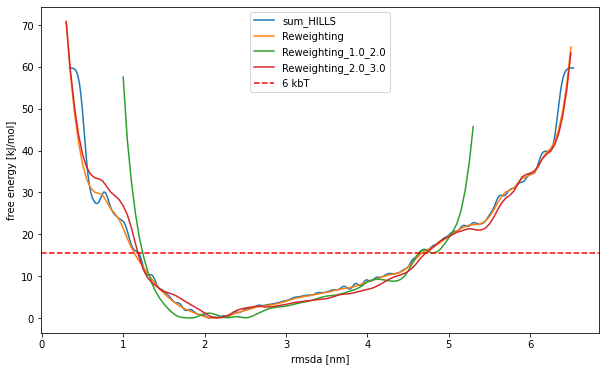

In [7]:
plt.figure(figsize=(10,6))
plt.xlabel("rmsda [nm]")
plt.ylabel("free energy [kJ/mol]")
plt.plot(data_b["rmsda"],data_b["file.free"], label="sum_HILLS")
plt.plot(data_r["rmsda"],data_r["ffrmsda"]-min(data_r["ffrmsda"]),label="Reweighting")
plt.plot(data_r1_2["rmsda"],data_r1_2["ffrmsda"]-min(data_r1_2["ffrmsda"]),label="Reweighting_1.0_2.0")
plt.plot(data_r2_3["rmsda"],data_r2_3["ffrmsda"]-min(data_r2_3["ffrmsda"]),label="Reweighting_2.0_3.0")
plt.axhline(y = 15.42, color = 'r', linestyle = 'dashed', label = "6 kbT")  
#plt.ylim([0, 20])
plt.legend()